In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the classification data
from sklearn.datasets import load_breast_cancer
 
#Loading the data
data = load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

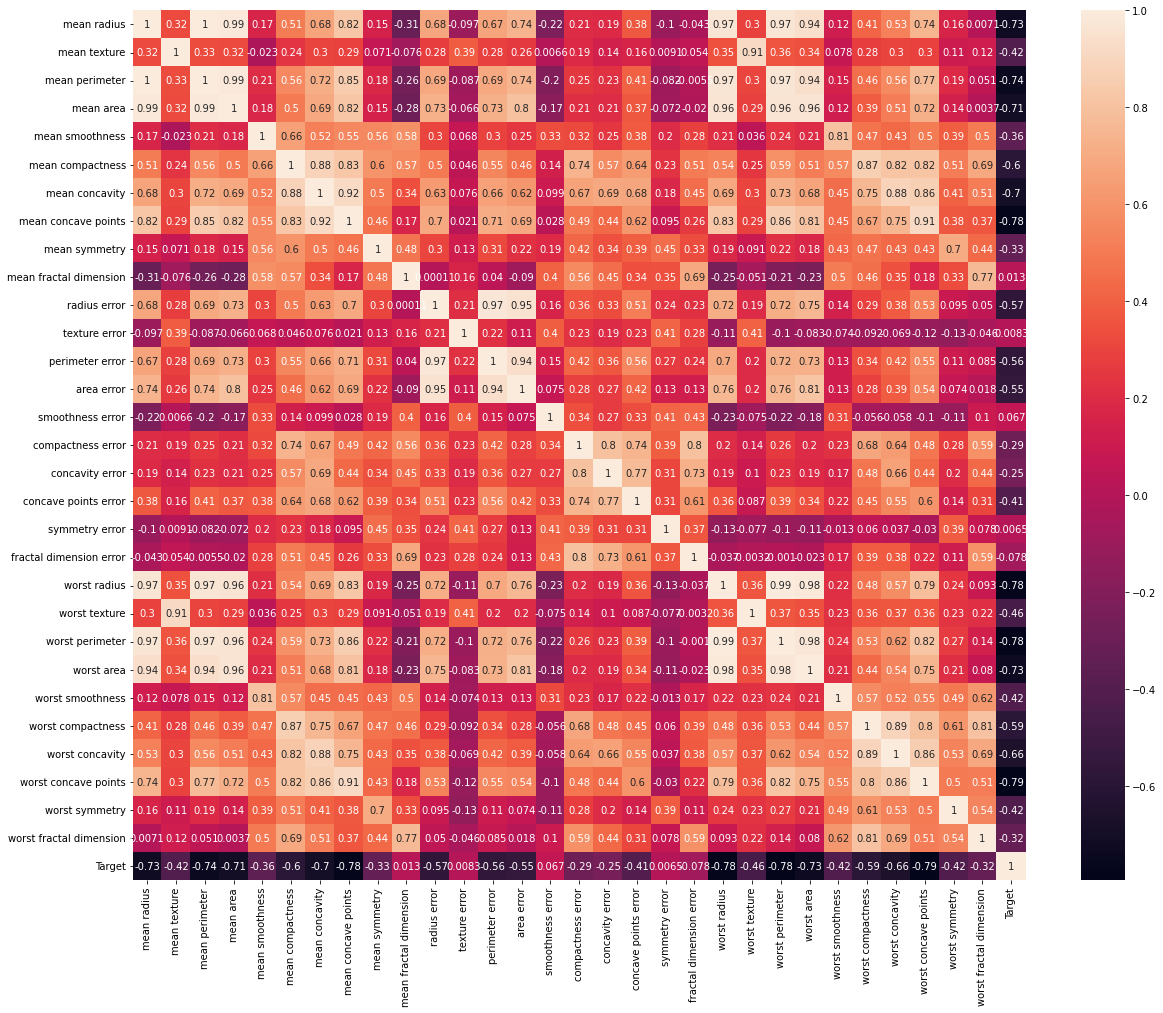

In [4]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)

In [5]:
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            h = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(h,self.y)
 
            dW = self.gradient_descent(self.x , h, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , threshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= threshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
        return y_pred

    def weights(self):
        return self.weight

In [6]:
#Preparing the data
feature='mean radius'
x = df[feature].values.reshape(-1,1)
y = df.Target
thre=0.5

#creating the class Object
regressor = LogisticRegression(x,y)
 
regressor.fit(0.1 , 10000) 
y_pred = regressor.predict(x,thre)
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0]))

fitted successfully to data
accuracy -> 0.8804920913884007


In [24]:
regressor.weights()

array([14.52260594, -0.98304146])

In [8]:
df.Target.value_counts()

1    357
0    212
Name: Target, dtype: int64

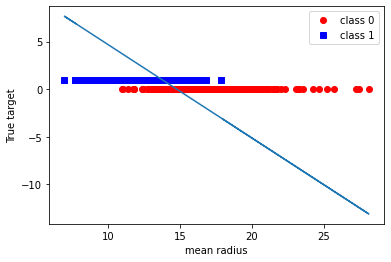

In [9]:
ind=np.argsort(y)
lim=sum(y==0)
plt.plot(x[ind[0:lim]],y[ind[0:lim]],'ro',label='class 0')
plt.plot(x[ind[lim:]],y[ind[lim:]],'bs', label='class 1')
plt.plot(x, x*regressor.weights()[1]+regressor.weights()[0])
plt.xlabel(feature)
plt.ylabel('True target')
plt.legend()

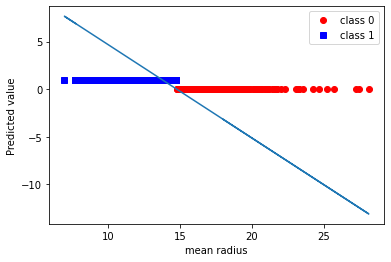

In [10]:
y_pred=regressor.predict(x,thre)
ind=np.argsort(y_pred)
lim=sum(y_pred==0)
plt.plot(x[ind[0:lim]],y_pred[ind[0:lim]],'ro',label='class 0')
plt.plot(x[ind[lim:]],y_pred[ind[lim:]],'bs', label='class 1')
plt.plot(x, x*regressor.weights()[1]+regressor.weights()[0])
plt.xlabel(feature)
plt.ylabel('Predicted value')
plt.legend()

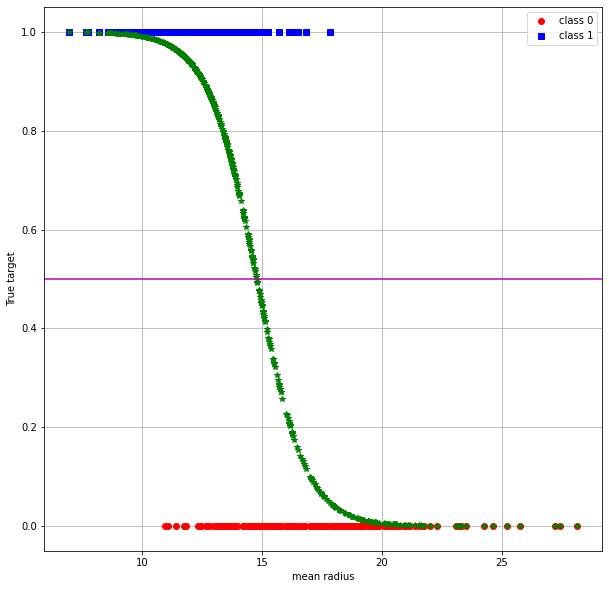

In [11]:
ind=np.argsort(y)
lim=sum(y==0)
plt.figure(figsize=(10,10))
plt.plot(x[ind[0:lim]],y[ind[0:lim]],'ro',label='class 0')
plt.plot(x[ind[lim:]],y[ind[lim:]],'bs', label='class 1')
plt.plot(x, 1/(1+np.exp(-x*regressor.weights()[1]-regressor.weights()[0])),'g*')
plt.axhline(y = thre, color = 'm', linestyle = '-')
plt.xlabel(feature)
plt.ylabel('True target')
plt.legend()
plt.grid()

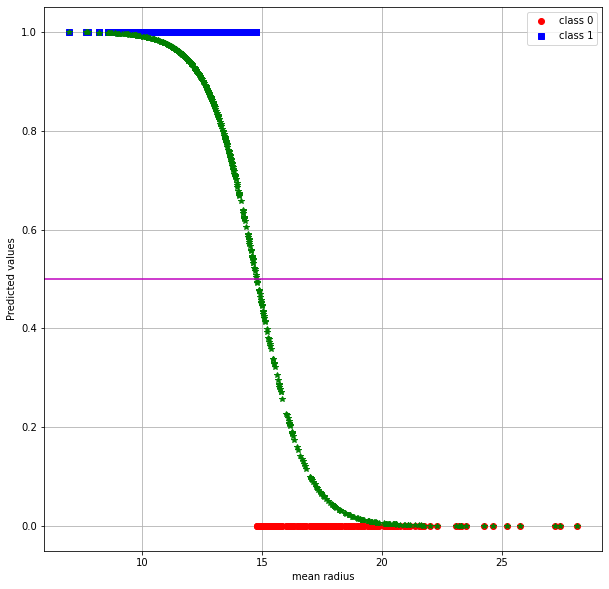

In [12]:
y_pred=regressor.predict(x,thre)
ind=np.argsort(y_pred)
lim=sum(y_pred==0)
plt.figure(figsize=(10,10))
plt.plot(x[ind[0:lim]],y_pred[ind[0:lim]],'ro',label='class 0')
plt.plot(x[ind[lim:]],y_pred[ind[lim:]],'bs', label='class 1')
plt.plot(x, 1/(1+np.exp(-x*regressor.weights()[1]-regressor.weights()[0])),'g*')
plt.axhline(y = thre, color = 'm', linestyle = '-')
plt.xlabel(feature)
plt.ylabel('Predicted values')
plt.legend()
plt.grid()

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("Precision Score = ",precision_score(y,y_pred))
print("Recall Score = ",recall_score(y,y_pred))
print("Accuracy Score = ",accuracy_score(y, y_pred))
print("F1 Score = ",f1_score(y,y_pred))

print("Confusion Matix:")
print(confusion_matrix(y, y_pred))

Precision Score =  0.8812664907651715
Recall Score =  0.9355742296918768
Accuracy Score =  0.8804920913884007
F1 Score =  0.907608695652174
Confusion Matix:
[[167  45]
 [ 23 334]]


Changing learning rate to 0.01

In [25]:
#Preparing the data
feature='mean radius'
x = df[feature].values.reshape(-1,1)
y = df.Target
thre=0.5

#creating the class Object
regressor = LogisticRegression(x,y)
 
regressor.fit(0.01 , 10000) 
y_pred = regressor.predict(x,thre)
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0]))
print("Precision Score = ",precision_score(y,y_pred))
print("Recall Score = ",recall_score(y,y_pred))
print("Accuracy Score = ",accuracy_score(y, y_pred))
print("F1 Score = ",f1_score(y,y_pred))

print("Confusion Matix:")
print(confusion_matrix(y, y_pred))


fitted successfully to data
accuracy -> 0.875219683655536
Precision Score =  0.8470873786407767
Recall Score =  0.9775910364145658
Accuracy Score =  0.875219683655536
F1 Score =  0.907672301690507
Confusion Matix:
[[149  63]
 [  8 349]]


changing learning rate to 0.001

In [26]:
#Preparing the data
feature='mean radius'
x = df[feature].values.reshape(-1,1)
y = df.Target
thre=0.5

#creating the class Object
regressor = LogisticRegression(x,y)
 
regressor.fit(0.001 , 10000) 
y_pred = regressor.predict(x,thre)
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0]))
print("Precision Score = ",precision_score(y,y_pred))
print("Recall Score = ",recall_score(y,y_pred))
print("Accuracy Score = ",accuracy_score(y, y_pred))
print("F1 Score = ",f1_score(y,y_pred))

print("Confusion Matix:")
print(confusion_matrix(y, y_pred))


fitted successfully to data
accuracy -> 0.7680140597539543
Precision Score =  0.7300613496932515
Recall Score =  1.0
Accuracy Score =  0.7680140597539543
F1 Score =  0.8439716312056738
Confusion Matix:
[[ 80 132]
 [  0 357]]


Accuracy decreased as it would take long to converge due to low learning rate. Lets increase the iterations and see what happens:

In [27]:
#Preparing the data
feature='mean radius'
x = df[feature].values.reshape(-1,1)
y = df.Target
thre=0.5

#creating the class Object
regressor = LogisticRegression(x,y)
 
regressor.fit(0.001 , 30000) 
y_pred = regressor.predict(x,thre)
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0]))
print("Precision Score = ",precision_score(y,y_pred))
print("Recall Score = ",recall_score(y,y_pred))
print("Accuracy Score = ",accuracy_score(y, y_pred))
print("F1 Score = ",f1_score(y,y_pred))

print("Confusion Matix:")
print(confusion_matrix(y, y_pred))

#the accuracy improved in comparison to less iteration!


fitted successfully to data
accuracy -> 0.8453427065026362
Precision Score =  0.8077803203661327
Recall Score =  0.988795518207283
Accuracy Score =  0.8453427065026362
F1 Score =  0.889168765743073
Confusion Matix:
[[128  84]
 [  4 353]]
